<a href="https://colab.research.google.com/github/kingajutrzenka/Influence-of-factors-on-solcial-anxiety/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Influence of factors on solcial anxiety**

# Import

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def pastel():
    """Pastel aesthetic – blues & purples"""
    palette = ["#A3C4F3", "#90A8ED", "#8E94F2", "#9A8C98", "#C9BBCF"]
    sns.set_theme(
        style="whitegrid",
        rc={
            "axes.spines.top": False,
            "axes.spines.right": False,
            "axes.titlesize": 16,
            "axes.labelsize": 12,
            "grid.alpha": 0.2,
            "figure.dpi": 120,
            "savefig.dpi": 150,
        }
    )
    sns.set_palette(palette)
    return palette

In [16]:
df1 = pd.read_csv("family_anxiety_14_dataset.csv")
df1.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,58,Male,Nurse,6.2,1.3,192,16,No,Yes,1,117,21,1,No,Yes,9,No,1,3.0
1,39,Female,Engineer,8.6,3.8,367,15,No,No,10,113,14,3,Yes,Yes,6,Yes,3,4.0
2,42,Female,Doctor,6.6,0.5,132,1,No,No,10,79,20,1,Yes,No,1,No,6,6.0
3,43,Female,Athlete,7.0,1.6,361,15,No,No,4,69,25,2,Yes,No,5,Yes,10,2.0
4,55,Other,Athlete,7.6,2.8,531,0,No,No,3,65,12,4,No,No,6,Yes,4,4.0


In [17]:
df = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

# Preprocessing

In [8]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
cat_cols

['Gender',
 'Occupation',
 'Smoking',
 'Family History of Anxiety',
 'Dizziness',
 'Medication',
 'Recent Major Life Event']

In [11]:
for col in cat_cols:
  df[col] = df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                11000 non-null  int64   
 1   Gender                             11000 non-null  category
 2   Occupation                         11000 non-null  category
 3   Sleep Hours                        11000 non-null  float64 
 4   Physical Activity (hrs/week)       11000 non-null  float64 
 5   Caffeine Intake (mg/day)           11000 non-null  int64   
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64   
 7   Smoking                            11000 non-null  category
 8   Family History of Anxiety          11000 non-null  category
 9   Stress Level (1-10)                11000 non-null  int64   
 10  Heart Rate (bpm)                   11000 non-null  int64   
 11  Breathing Rate (breaths/min)       11000 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11000.0,40.414818,13.349472,18.0,29.0,40.0,52.0,64.0
Sleep Hours,11000.0,6.772427,1.615210,0.2,5.6,6.8,7.9,12.5
Physical Activity (hrs/week),11000.0,2.916464,1.836844,0.0,1.4,2.8,4.2,11.2
Caffeine Intake (mg/day),11000.0,313.291364,172.920481,0.0,163.0,326.0,462.0,599.0
Alcohol Consumption (drinks/week),11000.0,9.725545,5.716079,0.0,5.0,10.0,15.0,19.0
Stress Level (1-10),11000.0,5.808545,2.941883,1.0,3.0,6.0,8.0,10.0
Heart Rate (bpm),11000.0,90.994000,17.138795,60.0,76.0,92.0,106.0,119.0
Breathing Rate (breaths/min),11000.0,20.790909,5.181014,12.0,16.0,21.0,25.0,29.0
Sweating Level (1-5),11000.0,3.081273,1.401405,1.0,2.0,3.0,4.0,5.0
Therapy Sessions (per month),11000.0,4.684727,2.852922,0.0,2.0,5.0,7.0,9.0


In [14]:
df.describe(include="category").T

,count,unique,top,freq
Gender,11000,3,Other,3706
Occupation,11000,13,Scientist,880
Smoking,11000,2,No,8511
Family History of Anxiety,11000,2,No,9531
Dizziness,11000,2,Yes,5697
Medication,11000,2,Yes,5597
Recent Major Life Event,11000,2,Yes,5751


# Data distributions

In [54]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep_hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

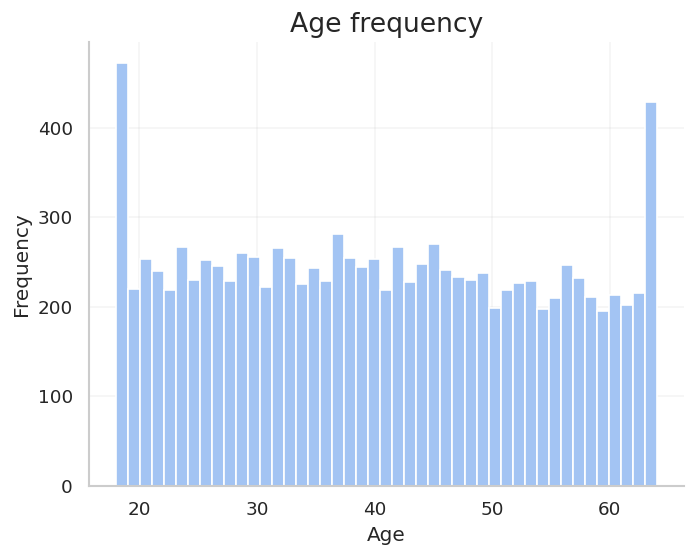

In [40]:
_ = df.Age.plot(kind="hist", bins=45, color = pastel(), xlabel = 'Age', title = 'Age frequency' )

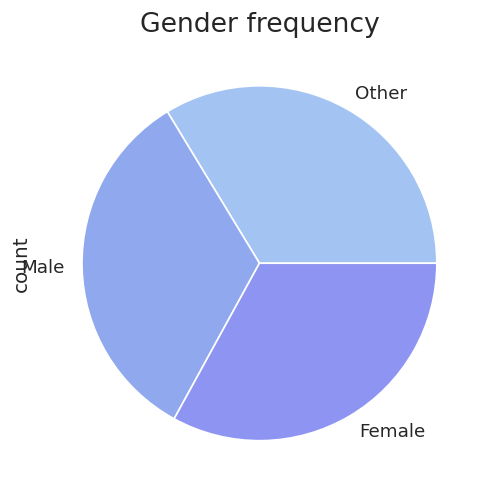

In [42]:
_ = df.Gender.value_counts().plot(kind="pie", color = pastel(), title = 'Gender frequency' )

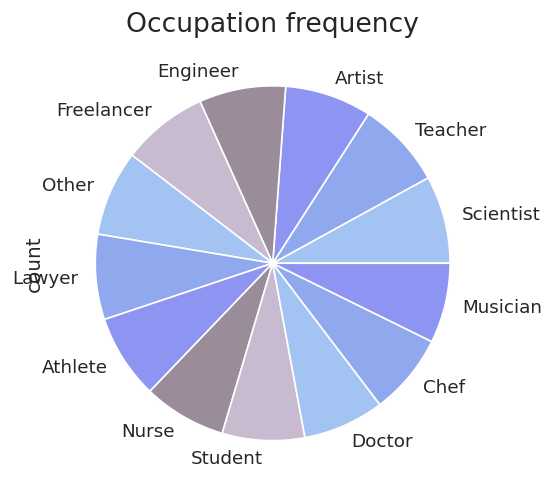

In [45]:
_ = df.Occupation.value_counts().plot(kind="pie", color = pastel(), title = 'Occupation frequency' )

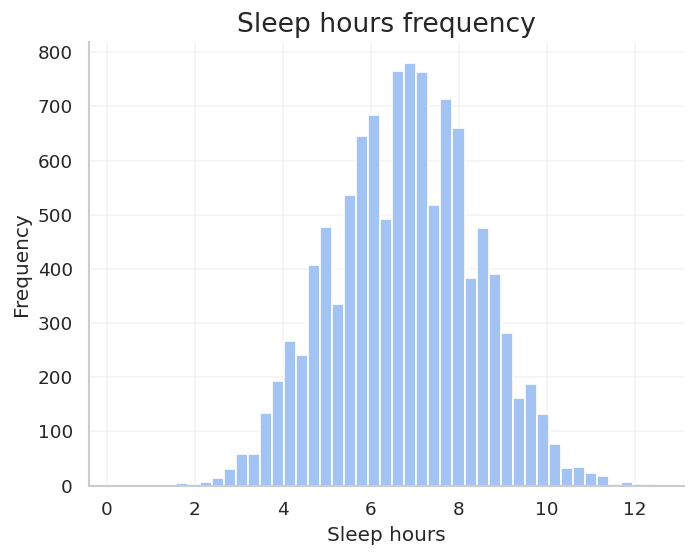

In [52]:
_ = df.Sleep_hours.plot(kind="hist", bins=45, color = pastel(), xlabel = 'Sleep hours', title = 'Sleep hours frequency' )

**...**

In [57]:
df_dummies = pd.get_dummies(df, drop_first=True, dtype=int)
df_dummies.head()

,Age,Sleep_hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),...,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher,Smoking_Yes,Family History of Anxiety_Yes,Dizziness_Yes,Medication_Yes,Recent Major Life Event_Yes
0,58,6.2,1.3,192,16,1,117,21,1,9,...,1,0,0,0,0,0,1,0,1,0
1,39,8.6,3.8,367,15,10,113,14,3,6,...,0,0,0,0,0,0,0,1,1,1
2,42,6.6,0.5,132,1,10,79,20,1,1,...,0,0,0,0,0,0,0,1,0,0
3,43,7.0,1.6,361,15,4,69,25,2,5,...,0,0,0,0,0,0,0,1,0,1
4,55,7.6,2.8,531,0,3,65,12,4,6,...,0,0,0,0,0,0,0,0,0,1


In [60]:
corr = df_dummies.corr()
corr

,Age,Sleep_hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),...,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher,Smoking_Yes,Family History of Anxiety_Yes,Dizziness_Yes,Medication_Yes,Recent Major Life Event_Yes
Age,1.000000,0.057897,0.048373,-0.045876,0.012576,-0.041403,-0.036401,-0.037911,-0.025392,-0.023112,...,0.006113,0.008408,0.016994,-0.006968,-0.001521,-0.010050,-0.004532,-0.020147,-0.016739,-0.009621
Sleep_hours,0.057897,1.000000,0.137835,-0.110606,-0.046354,-0.154211,-0.100967,-0.108805,-0.089860,-0.092230,...,0.010567,-0.014113,0.002752,0.008944,0.000649,-0.009910,-0.014213,-0.051897,-0.023236,-0.073657
Physical Activity (hrs/week),0.048373,0.137835,1.000000,-0.063152,-0.046834,-0.105446,-0.053533,-0.086708,-0.068266,-0.055669,...,0.004113,-0.005486,0.009489,0.010499,0.000671,0.001138,-0.006022,-0.043037,-0.002252,-0.036147
Caffeine Intake (mg/day),-0.045876,-0.110606,-0.063152,1.000000,0.015119,0.087090,0.061295,0.054571,0.062302,0.049902,...,-0.021567,0.004970,0.002044,-0.002310,0.000269,-0.013353,-0.007781,0.018844,0.015587,0.035507
Alcohol Consumption (drinks/week),0.012576,-0.046354,-0.046834,0.015119,1.000000,0.024162,0.053488,0.031543,0.030705,0.023562,...,0.004306,-0.010647,0.002610,-0.008105,0.003360,0.013119,-0.001675,0.001928,0.018902,0.031441
Stress Level (1-10),-0.041403,-0.154211,-0.105446,0.087090,0.024162,1.000000,0.078933,0.083471,0.071454,0.056232,...,-0.013026,0.001414,-0.004957,0.005645,-0.001172,-0.009415,-0.021509,0.027813,0.022227,0.046901
Heart Rate (bpm),-0.036401,-0.100967,-0.053533,0.061295,0.053488,0.078933,1.000000,0.059823,0.051981,0.042458,...,-0.015659,0.007203,-0.000777,0.003501,-0.007264,-0.010713,-0.003683,0.034058,-0.006381,0.017061
Breathing Rate (breaths/min),-0.037911,-0.108805,-0.086708,0.054571,0.031543,0.083471,0.059823,1.000000,0.046480,0.043474,...,-0.000519,0.003625,-0.004592,0.004309,0.019373,-0.014199,-0.004532,0.018970,0.021035,0.034586
Sweating Level (1-5),-0.025392,-0.089860,-0.068266,0.062302,0.030705,0.071454,0.051981,0.046480,1.000000,0.066011,...,0.001300,-0.004773,-0.001798,-0.003725,-0.009559,-0.026247,0.019760,0.025705,0.002351,0.027093
Therapy Sessions (per month),-0.023112,-0.092230,-0.055669,0.049902,0.023562,0.056232,0.042458,0.043474,0.066011,1.000000,...,0.009350,0.007190,0.002518,0.005129,-0.007364,0.004167,0.008538,0.014547,0.018204,0.028718


<Axes: >

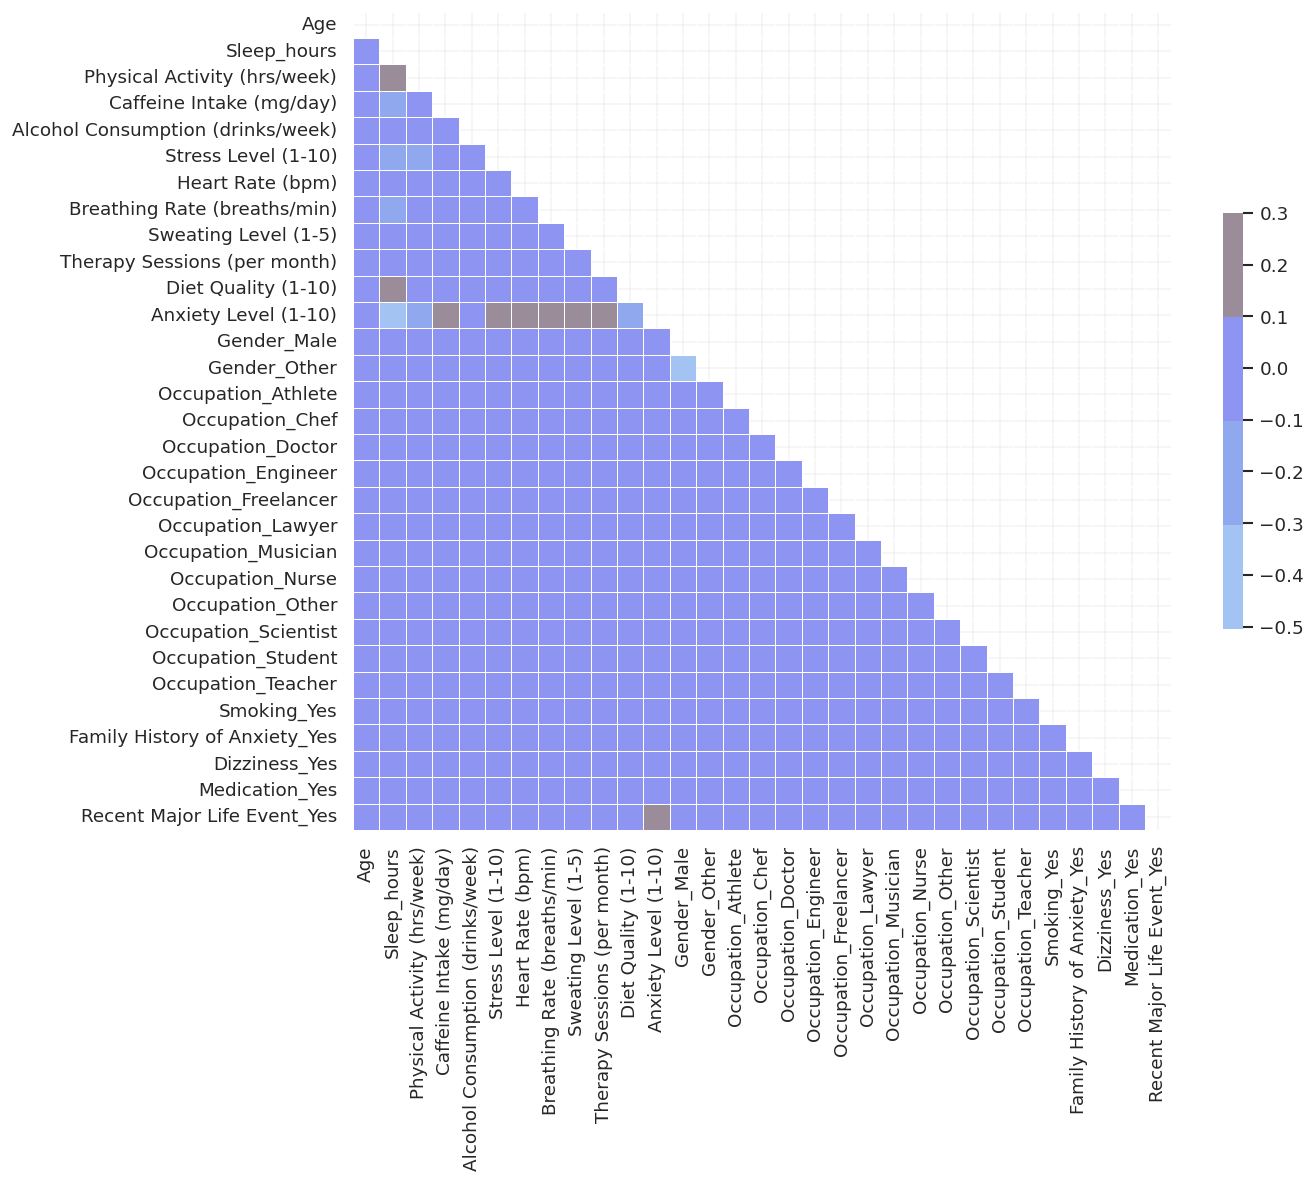

In [61]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette(pastel(), as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [63]:
df_dummies.corr()['Anxiety Level (1-10)'].sort_values(ascending=False)

,Anxiety Level (1-10)
Anxiety Level (1-10),1.000000
Stress Level (1-10),0.658535
Caffeine Intake (mg/day),0.286859
Therapy Sessions (per month),0.259687
Heart Rate (bpm),0.172786
Breathing Rate (breaths/min),0.162739
Sweating Level (1-5),0.157976
Recent Major Life Event_Yes,0.110064
Dizziness_Yes,0.078812
Alcohol Consumption (drinks/week),0.077074


<Axes: >

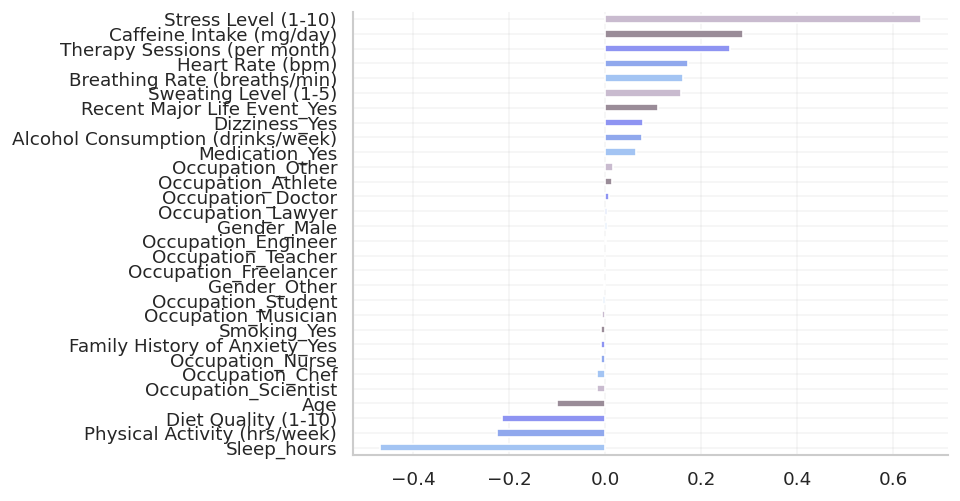

In [65]:
df_dummies.corr()['Anxiety Level (1-10)'].sort_values()[:-1].plot(kind='barh', color = pastel())

The biggest correlation with social axiety have: stress level, caffeine intake, therapy sessions, sleep hours, physical activity and diet quality.

# Linear regression

In [67]:
data = df_dummies.copy()
target = data.pop('Anxiety Level (1-10)')

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8250, 30)
(2750, 30)
(8250,)
(2750,)


In [70]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
regressor.score(X_test, y_test)

0.6740084182966373

In [73]:
y_pred = regressor.predict(X_test)
y_true = y_test.copy()

In [74]:
predictions = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
107,4.0,6.131705,-2.131705
5484,2.0,2.707032,-0.707032
6998,10.0,7.590409,2.409591
3984,4.0,5.810264,-1.810264
3111,5.0,5.834012,-0.834012


In [79]:
predictions.error.sort_values()

,error
6765,-3.680176
4754,-3.576636
2107,-3.536252
5506,-3.533817
8328,-3.499544
...,...
29,3.500446
10924,3.516534
906,3.657960
8608,3.854654


<Axes: title={'center': 'error frequency'}, ylabel='Frequency'>

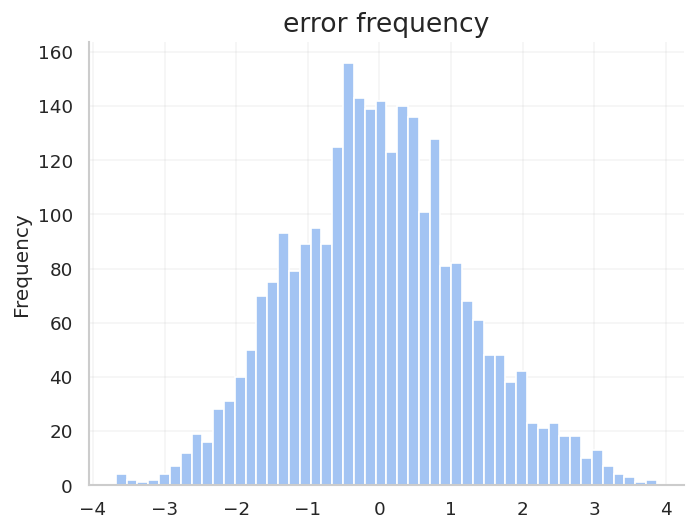

In [80]:
predictions.error.plot(kind='hist', bins=50, color = pastel(), title='error frequency')

In [81]:
regressor.intercept_

np.float64(2.4889024125633887)

In [82]:
regressor.coef_

array([-0.00496815, -0.39732771, -0.09211473,  0.00215231,  0.00902498,
        0.39899442,  0.00723766,  0.01843954,  0.06682257,  0.13049828,
       -0.05433275,  0.04558307,  0.00623953, -0.03920441, -0.16388687,
        0.03926254, -0.03877496, -0.05985572, -0.05275829, -0.07730384,
        0.01134118, -0.00515535, -0.16890324, -0.14194824, -0.07733763,
       -0.03309819, -0.0630863 ,  0.13694697,  0.14414859,  0.1598608 ])

# Backward elimination

In [87]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

ols = sm.OLS(y_train, X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
ols.summary(xname=predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Anxiety Level (1-10)   R-squared:                       0.677
Model:                              OLS   Adj. R-squared:                  0.676
Method:                   Least Squares   F-statistic:                     573.9
Date:                  Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                          18:43:21   Log-Likelihood:                -13194.
No. Observations:                  8250   AIC:                         2.645e+04
Df Residuals:                      8219   BIC:                         2.667e+04
Df Model:                            30                                         
Covariance Type:              nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.4889      0.146     17.100      0.000       2.204       2.774
Age                                  -0.0050      0.001     -5.002      0.000      -0.007      -0.003
Sleep_hours                          -0.3973      0.009    -46.636      0.000      -0.414      -0.381
Physical Activity (hrs/week)         -0.0921      0.007    -12.501      0.000      -0.107      -0.078
Caffeine Intake (mg/day)              0.0022   7.76e-05     27.721      0.000       0.002       0.002
Alcohol Consumption (drinks/week)     0.0090      0.002      3.873      0.000       0.004       0.014
Stress Level (1-10)                   0.3990      0.005     86.681      0.000       0.390       0.408
Heart Rate (bpm)                      0.0072      0.001      9.278      0.000       0.006       0.009
Breathing Rate (breaths/min)          0.0184      0.003      7.147      0.000       0.013       0.023
Sweating Level (1-5)                  0.0668      0.010      6.973      0.000       0.048       0.086
Therapy Sessions (per month)          0.1305      0.005     27.925      0.000       0.121       0.140
Diet Quality (1-10)                  -0.0543      0.005    -11.564      0.000      -0.064      -0.045
Gender_Male                           0.0456      0.033      1.401      0.161      -0.018       0.109
Gender_Other                          0.0062      0.032      0.193      0.847      -0.057       0.070
Occupation_Athlete                   -0.0392      0.067     -0.589      0.556      -0.170       0.091
Occupation_Chef                      -0.1639      0.068     -2.419      0.016      -0.297      -0.031
Occupation_Doctor                     0.0393      0.068      0.575      0.565      -0.095       0.173
Occupation_Engineer                  -0.0388      0.066     -0.587      0.557      -0.168       0.091
Occupation_Freelancer                -0.0599      0.067     -0.899      0.369      -0.190       0.071
Occupation_Lawyer                    -0.0528      0.067     -0.792      0.428      -0.183       0.078
Occupation_Musician                  -0.0773      0.068     -1.140      0.254      -0.210       0.056
Occupation_Nurse                      0.0113      0.067      0.169      0.866      -0.120       0.143
Occupation_Other                     -0.0052      0.067     -0.078      0.938      -0.136       0.125
Occupation_Scientist                 -0.1689      0.067     -2.536      0.011      -0.299      -0.038
Occupation_Student                   -0.1419      0.067     -2.117      0.034      -0.273      -0.010
Occupation_Teacher                   -0.0773      0.067     -1.159      0.247      -0.208       0.054
Smoking_Yes                          -0.0331      0.032     -1.046      0.295      -0.095       0.029
F

In [89]:
import statsmodels.api as sm

SL = 0.05

Xdf = X_train.copy()
Xdf = sm.add_constant(Xdf, has_constant='add')
current = list(Xdf.columns)

while True:
    model = sm.OLS(y_train, Xdf).fit()

    p = model.pvalues.drop(labels=['const'], errors='ignore')
    worst_p = p.max()
    if worst_p <= SL:
        break
    worst_feat = p.idxmax()
    Xdf = Xdf.drop(columns=[worst_feat])
    current.remove(worst_feat)

print(model.summary(xname=current))

                             OLS Regression Results                             
Dep. Variable:     Anxiety Level (1-10)   R-squared:                       0.676
Model:                              OLS   Adj. R-squared:                  0.676
Method:                   Least Squares   F-statistic:                     1012.
Date:                  Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                          18:43:33   Log-Likelihood:                -13200.
No. Observations:                  8250   AIC:                         2.644e+04
Df Residuals:                      8232   BIC:                         2.656e+04
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

model:

y = ( 2.4507

    - 0.0049 * Age

    - 0.3969 * Sleep_hours

    - 0.0921 * Physical_Activity

    + 0.0022 * Caffeine_Intake

    + 0.0090 * Alcohol_Consumption

    + 0.3990 * Stress_Level

    + 0.0072 * Heart_Rate

    + 0.0185 * Breathing_Rate

    + 0.0671 * Sweating_Level

    + 0.1305 * Therapy_Sessions

    - 0.0541 * Diet_Quality

    - 0.1345 * Occupation_Chef

    - 0.1365 * Occupation_Scientist

    - 0.1118 * Occupation_Student

    + 0.1366 * Dizziness_Yes

    + 0.1452 * Medication_Yes

    + 0.1590 * Recent_Major_Life_Event_Yes

)


In [91]:
ols.save('model.pickle')